In [9]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.18.2', 'qiskit-aer': '0.9.0', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.16.0', 'qiskit-aqua': '0.9.5', 'qiskit': '0.30.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [10]:
from qiskit import *

In [11]:
circuit = QuantumCircuit(1,1)
circuit.draw()

q_0: 
     
c: 1/

In [12]:
circuit.h(0)
circuit.draw()

┌───┐
q_0: ┤ H ├
     └───┘
c: 1/═════

In [13]:
circuit.measure([0], [0])
circuit.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [16]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit,simulator,shots = 10000)
result = job.result()

counts = result.get_counts(circuit)
print(counts)

{'1': 4993, '0': 5007}


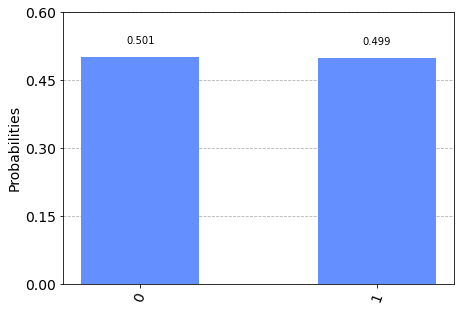

In [18]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)

In [19]:
apitoken = '0ac08bc0e23b22dcff4888822d56241be15b0a64e77e94c42639a524404aafbc7df008ab6043e4706b3b82aa42f03c06464b3c253b92ddf1337e80048cf53be0'
IBMQ.save_account(apitoken)

In [30]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q', group = 'open', project = 'main')
qcomp = provider.get_backend('ibmq_santiago')
job = execute(circuit, backend = qcomp, shots = 1000)

ibmqfactory.load_account:WARNING:2021-09-23 11:51:02,824: Credentials are already in use. The existing account in the session will be replaced.


In [31]:
from qiskit.tools.monitor import job_monitor

job_monitor(job)

Job Status: job has successfully run


In [32]:
result = job.result()
counts = result.get_counts(circuit)

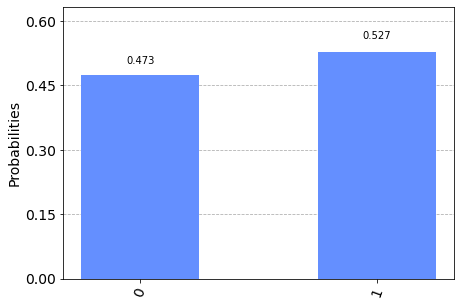

In [33]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)